# Ejercicio 7

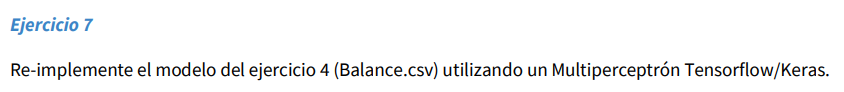

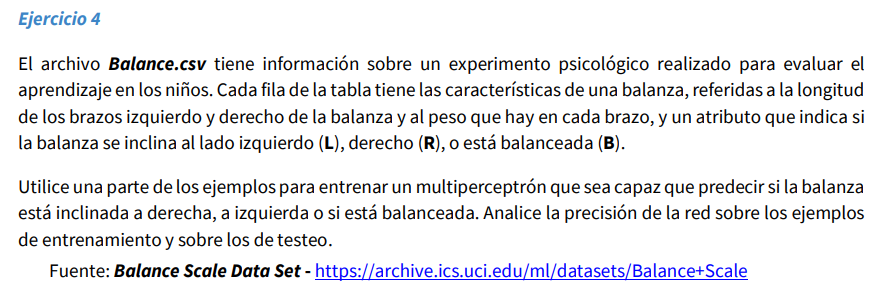

### Importe de datos y librerias

In [29]:

# configuración para notebook con instalación LOCAL
FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [30]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos
import numpy as np

nombre_archivo = DATOS_DIR + 'Balance.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'], sep=',')

df.head()

,Balance,LeftWeight,LeftDist,RightWeight,RightDist
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [31]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.utils import to_categorical

import numpy as np
from sklearn import preprocessing, metrics, model_selection 
import pandas as pd

### Ejercicio

In [32]:
X = np.array(df.iloc[:, 1:])
Y = np.array(df['Balance'])

In [33]:
encoder = preprocessing.LabelEncoder()
Y = encoder.fit_transform(Y)
print(Y)

etiquetas = encoder.inverse_transform([0,1,2])
print("\n\n Etiquetas = ",etiquetas)


[0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 2 2 2 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 2 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 1 1 0 2 1 0 2 2 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2 2 1 1 1 1 0 1 1 2 2 2 1
 2 2 2 2 1 2 2 2 2 0 2 2 2 2 1 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 1 0 2 1 0 2 2 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 0 2 2
 1 0 2 2 2 1 2 2 2 2 1 2 2 2 2 1 1 1 1 1 1 1 1 0 2 1 1 2 2 2 1 0 2 2 2 1 2
 2 2 2 1 1 1 1 1 1 1 1 1 0 1 1 1 2 2 1 1 2 2 2 1 0 2 2 2 1 1 0 2 2 1 2 2 2
 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 0 2 2 1 0 2 2 2 1 2 2 2 2 1
 2 2 2 2 1 1 1 1 1 1 1 1 1 2 1 1 0 2 2 1 1 2 2 2 1 2 2 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 2 1 1 0 2 2 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 2 2
 1 1 0 2 2 1 1 1 0 2 1 0 2 2 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1
 1 0 2 1 1 2 2 2 1 0 2 2 2 1 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 1 1 0 2
 2 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 1 1 1 2 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [34]:
X.shape

(625, 4)

In [35]:
Y.shape

(625,)

In [36]:
entradas = X.shape[1]
salidas = len(np.unique(Y))
print(entradas)
print (salidas)

4
3


In [38]:
#conjuntos de entrenamiento y testeo
X_train, X_test, Y_train, Y_test = model_selection.train_test_split( \
        X,Y, test_size=0.30)#, random_state=42)

normalizarEntrada = 1  # 1 si normaliza; 0 si no
if normalizarEntrada:
    # Escala los valores entre 0 y 1
    min_max_scaler = preprocessing.StandardScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_test = min_max_scaler.transform(X_test)

In [39]:
Y_trainB = to_categorical(Y_train) #convierto las etiquetas en su representacion one hot encoding

### Definicion del modelo

In [40]:
model=Sequential() #se crea un modelo de capas secuenciales
model.add(Dense(2, input_shape=[4], activation='tanh'))
model.add(Dense(3, activation='sigmoid'))
model.summary()

c:\Users\VICTUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19 (76.00 B)

 Trainable params: 19 (76.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
history = model.fit(X_train,Y_trainB, epochs=500)

Epoch 1/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2237 - loss: 1.3836  
Epoch 2/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - accuracy: 0.2445 - loss: 1.3238
Epoch 3/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - accuracy: 0.2876 - loss: 1.2672
Epoch 4/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - accuracy: 0.3165 - loss: 1.2176
Epoch 5/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.3360 - loss: 1.1716
Epoch 6/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.3576 - loss: 1.1454
Epoch 7/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.3206 - loss: 1.1449
Epoch 8/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.3731 - loss: 1.0959
Epoch 9/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.3747 - loss: 1.0806
Epoch 10/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3768 - loss: 1.0630 
Epoch 11/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4008 - loss: 1.0383 
Epoch 12/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [43]:
score = model.evaluate(X_train, Y_trainB)

print('Error :', score[0]) 
print('Accuracy:', score[1])

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - accuracy: 0.9223 - loss: 0.2197
Error : 0.23297005891799927
Accuracy: 0.9107551574707031


In [44]:
# predecir la salida del modelo
Y_pred = model.predict(X_train)

# Convertir la salida del modelo en un número entero
Y_pred2 = np.argmax(Y_pred,axis=1)

print("%% aciertos : %.3f" % metrics.accuracy_score(Y_train, Y_pred2))
print(Y_pred[:5,:])
print(Y_pred2[:5])

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
% aciertos : 0.911
[[0.38548765 0.45291394 0.5607039 ]
 [0.42097235 0.14339142 0.90796345]
 [0.426709   0.90335834 0.14932011]
 [0.435753   0.13646306 0.92542684]
 [0.42493755 0.960004   0.06176912]]
[2 2 1 2 1]


In [45]:
report = metrics.classification_report(Y_train, Y_pred2, target_names=etiquetas)
print("Training metrics:\n%s" % report) 

MM = metrics.confusion_matrix(Y_train, Y_pred2)
print("Confusion matrix:\n%s" % MM)

Training metrics:
              precision    recall  f1-score   support

           B       0.00      0.00      0.00        29
           L       0.94      0.97      0.96       187
           R       0.89      0.98      0.93       221

    accuracy                           0.91       437
   macro avg       0.61      0.65      0.63       437
weighted avg       0.85      0.91      0.88       437

Confusion matrix:
[[  0   7  22]
 [  0 181   6]
 [  0   4 217]]


c:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [46]:
# predecir la salida del modelo
Y_pred = model.predict(X_test)
Y_pred2 = np.argmax(Y_pred,axis=1)

print("%% aciertos X_train : %.3f" % metrics.accuracy_score(Y_test, Y_pred2))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step
% aciertos X_train : 0.840


In [47]:
report = metrics.classification_report(Y_test, Y_pred2, target_names=etiquetas)

print("Métricas de la clasificación:\n%s" % report) 

Métricas de la clasificación:
              precision    recall  f1-score   support

           B       0.00      0.00      0.00        20
           L       0.97      0.91      0.94       101
           R       0.71      0.99      0.82        67

    accuracy                           0.84       188
   macro avg       0.56      0.63      0.59       188
weighted avg       0.77      0.84      0.80       188



c:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [48]:
MM = metrics.confusion_matrix(Y_test, Y_pred2)

print("Confusion matrix:\n%s" % MM)
# Convertimos la matriz de confusión en un DataFrame con etiquetas
df_cm = pd.DataFrame(MM, index=etiquetas, columns=etiquetas)

# Mostramos el DataFrame resultante
print("\n\n",df_cm)

Confusion matrix:
[[ 0  2 18]
 [ 0 92  9]
 [ 0  1 66]]


    B   L   R
B  0   2  18
L  0  92   9
R  0   1  66


In [49]:
capaOculta = model.layers[0]
W1, b1 = capaOculta.get_weights()

capaSalida = model.layers[1]
W2,b2 = capaSalida.get_weights()

print("W1")
print(W1)

print("b1")
print(b1)

print("W2")
print(W2)

print("b2")
print(b2)

W1
[[-0.9425089   1.1804785 ]
 [-1.2689776   0.3454836 ]
 [ 1.0852557  -0.85010177]
 [ 1.1121906  -0.64941585]]
b1
[0.17338622 0.0882768 ]
W2
[[ 0.06980732 -2.2843392   2.523305  ]
 [ 0.11624873  1.3322929  -1.027472  ]]
b2
[-0.35810697 -0.00997705  0.36808297]
